In [1]:
import numpy as np
import pandas as pd
from scipy import special
from random import sample
import itertools
from datetime import timedelta
from IPython.display import display

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
fraude_df = pd.read_csv("Dados_fraude_com_pais", header=0)
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


Text(0, 0.5, 'Casos')

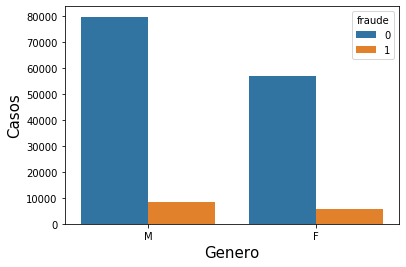

In [5]:
sns.countplot(x="genero", hue="fraude", data=fraude_df)
plt.xlabel("Genero", fontsize=15)
plt.ylabel("Casos", fontsize=15)

/home/sarinha/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Valor de compra')

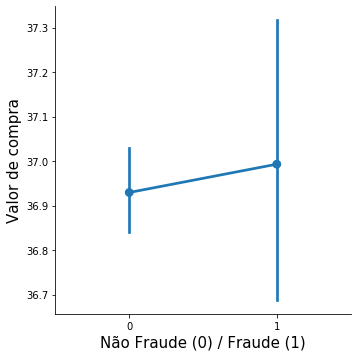

In [6]:
sns.factorplot(x="fraude", y="valor", data = fraude_df)
plt.xlabel("Não Fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Valor de compra", fontsize=15)

Text(-5.825000000000003, 0.5, 'Idade')

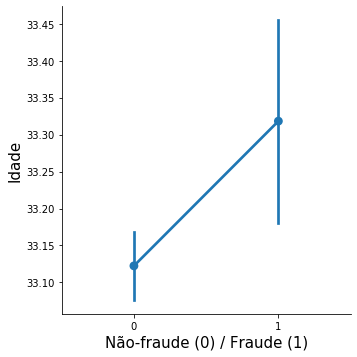

In [7]:
sns.factorplot(x="fraude",y="idade",data=fraude_df)
plt.xlabel("Não-fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Idade",fontsize=15)


Text(0, 0.5, 'Contagem')

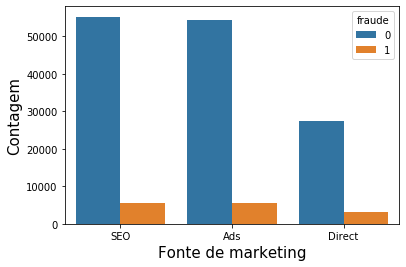

In [8]:
sns.countplot(x="fonte", hue="fraude", data=fraude_df)
plt.xlabel("Fonte de marketing", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

In [9]:
sums_f = fraude_df[fraude_df["fraude"] == 1]["fraude"].groupby(fraude_df.pais).sum()
sums_f = sums_f.to_frame().reset_index()

sums_nf = fraude_df[fraude_df["fraude"] == 0]["fraude"].groupby(fraude_df.pais).sum()
sums_nf = sums_nf.to_frame().reset_index()

Text(0, 0.5, 'Países')

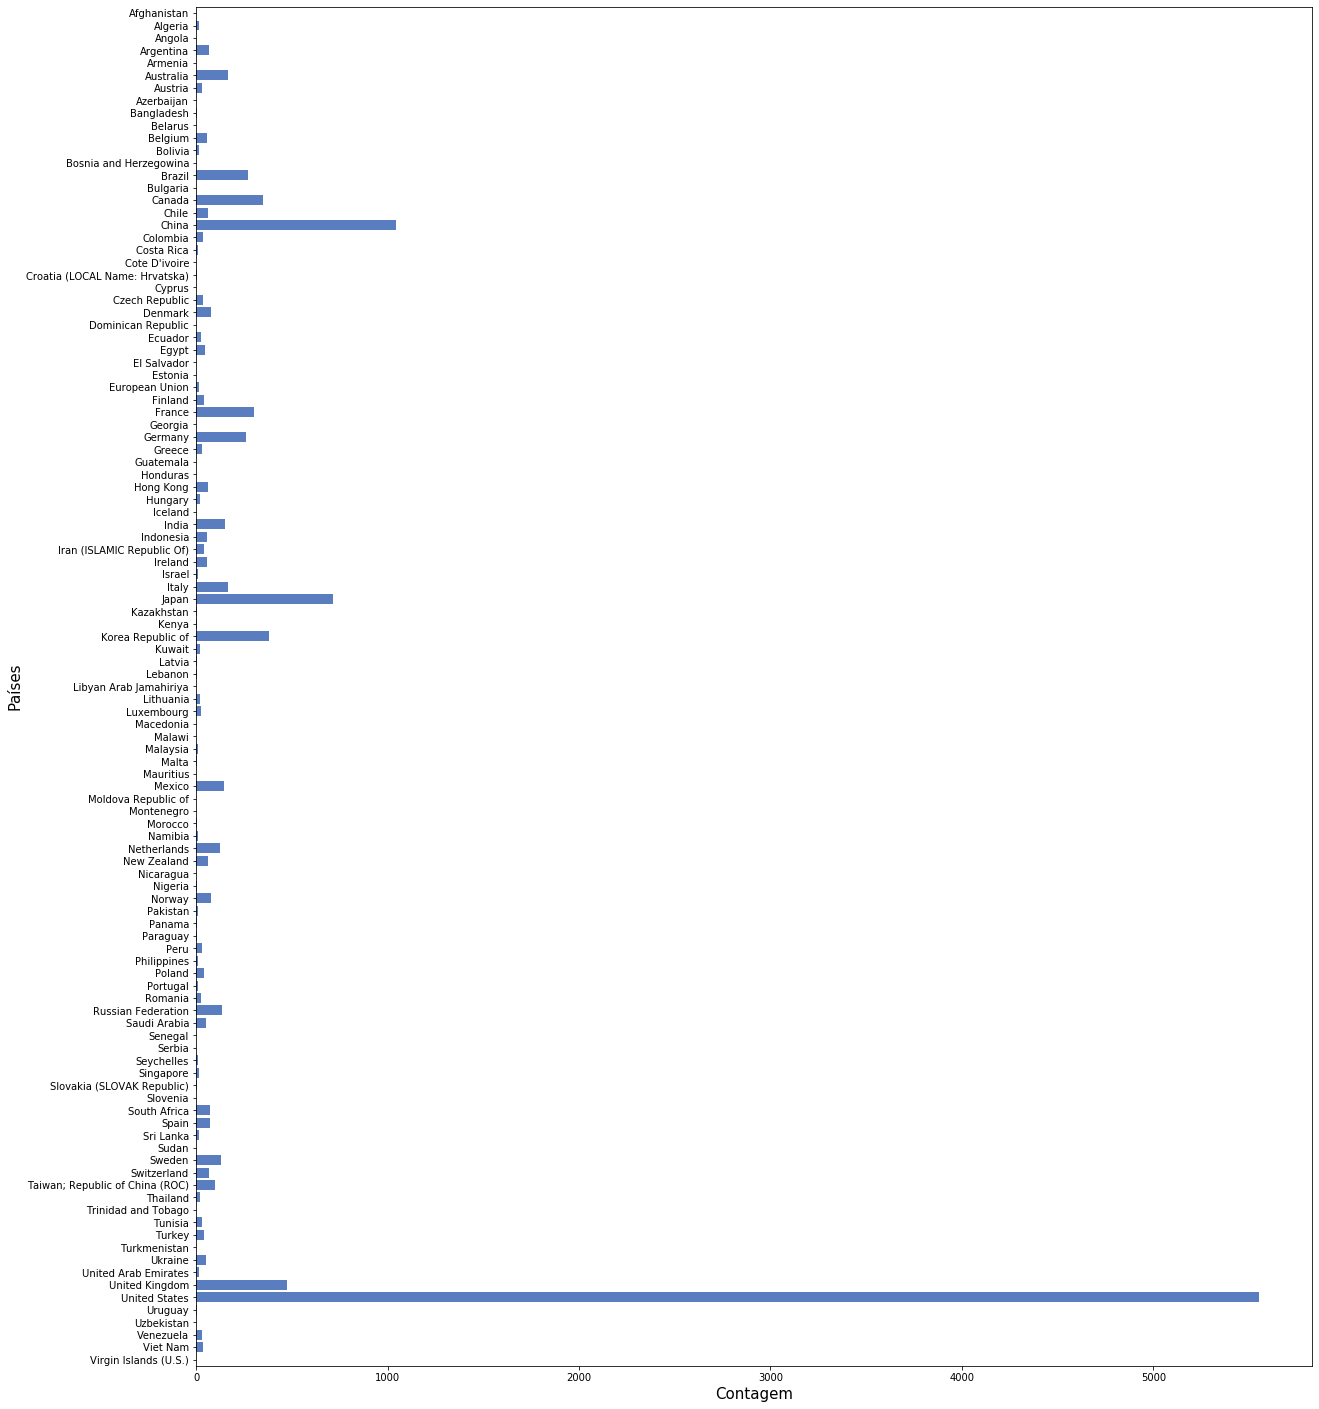

In [10]:
f, ax = plt.subplots(figsize=(20,25))
sns.set_color_codes("muted")
sns.barplot(x="fraude", y="pais", data=sums_f,
           label="Total",color="b")
plt.xlabel("Contagem",fontsize=15)
plt.ylabel("Países",fontsize=15)

In [12]:
tmp_df = pd.DataFrame(columns=("fraude","id_por_dispositivo","id_por_ip"))
tmp_df["fraude"] = fraude_df["fraude"]

userid_count = fraude_df.groupby("id_dispositivo").id.count()
tmp_df["id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count[x])

userid_count2 = fraude_df.groupby("ip").id.count()
tmp_df["id_por_ip"] = fraude_df.ip.apply(lambda x: userid_count2[x])

Text(16.299999999999997, 0.5, 'ID de usuário por endereço IP')

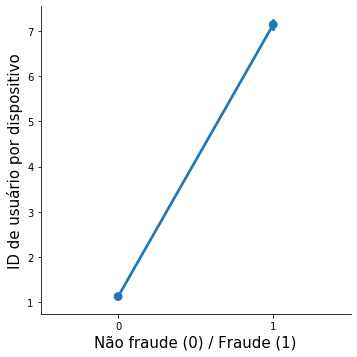

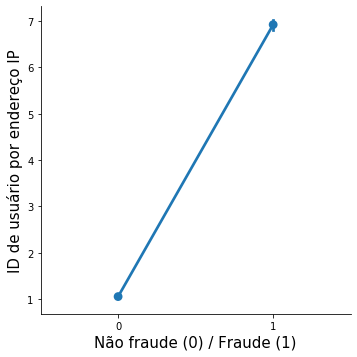

In [13]:
sns.factorplot(x="fraude",y="id_por_dispositivo", data=tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por dispositivo", fontsize=15)


sns.factorplot(x="fraude",y="id_por_ip", data=tmp_df)
plt.xlabel("Não fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("ID de usuário por endereço IP", fontsize=15)

In [14]:
tmp_df["cadastro"] = fraude_df.cadastro.apply(pd.to_datetime)
tmp_df["compra"] = fraude_df.compra.apply(pd.to_datetime)

tmp_df["tempo"] = (tmp_df.compra - tmp_df.cadastro).apply(lambda x: x.seconds)

Text(-8.825000000000003, 0.5, 'Tempo entre início e compra (segundos)')

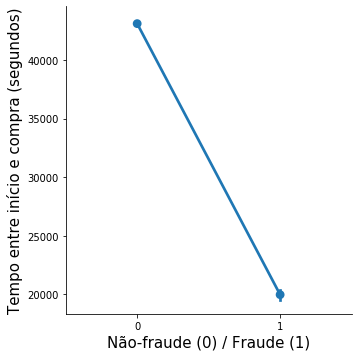

In [15]:
sns.factorplot(x="fraude",y="tempo",data=tmp_df)
plt.xlabel("Não-fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Tempo entre início e compra (segundos)", fontsize=15)

In [16]:
tmp_df.head()

,fraude,id_por_dispositivo,id_por_ip,cadastro,compra,tempo
0,0,1,1,2015-02-24 22:55:49,2015-04-18 02:47:11,13882
1,0,1,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944
2,1,12,12,2015-01-01 18:52:44,2015-01-01 18:52:45,1
3,0,1,1,2015-04-28 21:13:25,2015-05-04 13:54:50,60085
4,0,1,1,2015-07-21 07:09:52,2015-09-09 18:40:53,41461


Text(0, 0.5, 'Contagem')

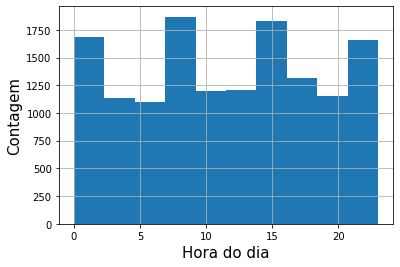

In [17]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.hour).hist()
plt.xlabel("Hora do dia", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Text(0, 0.5, 'Contagem')

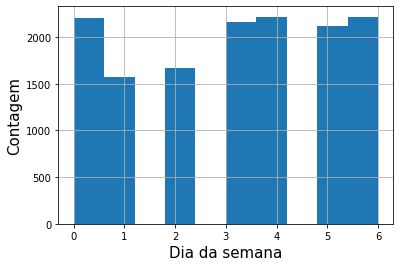

In [18]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.dayofweek).hist()
plt.xlabel("Dia da semana", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Text(0, 0.5, 'Contagem')

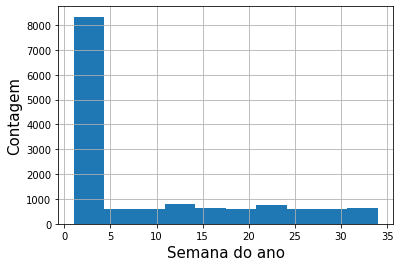

In [19]:
tmp_df[tmp_df["fraude"] == 1].cadastro.apply(lambda x: x.week).hist()
plt.xlabel("Semana do ano", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

In [24]:
pais_dummies = pd.get_dummies(fraude_df.pais, prefix='pais')
fraude_df = pd.concat([fraude_df, pais_dummies], axis=1)
fraude_df.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,...,pais_United States,pais_Uruguay,pais_Uzbekistan,pais_Vanuatu,pais_Venezuela,pais_Viet Nam,pais_Virgin Islands (U.S.),pais_Yemen,pais_Zambia,pais_Zimbabwe
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,0,0,0,0,0,0,0,0,0,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,1,0,0,0,0,0,0,0,0,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,1,0,0,0,0,0,0,0,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,...,0,0,0,0,0,0,0,0,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,1,0,0,0,0,0,0,0,0,0


In [25]:
fraude_df.drop(["id",
               "cadastro",
               "compra",
               "id_dispositivo",
               "ip",
               "id_por_dispositivo",
               "id_por_ip",
               "pais",
               "fonte",
               "browser",
               "genero",
               "idade",
               "valor"], axis=1, inplace = True)

![Alt text](https://upload.wikimedia.org/wikipedia/commons/e/e2/Bimodal.png)

/home/sarinha/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0, 0.5, 'Contagem normalizada')

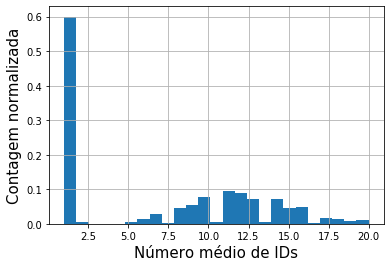

In [26]:
fraude_df[fraude_df["fraude"] == 1].media_id.hist(normed=True,bins=25)
plt.xlabel("Número médio de IDs", fontsize=15)
plt.ylabel("Contagem normalizada",fontsize=15)

Text(0, 0.5, 'Contagem normalizada')

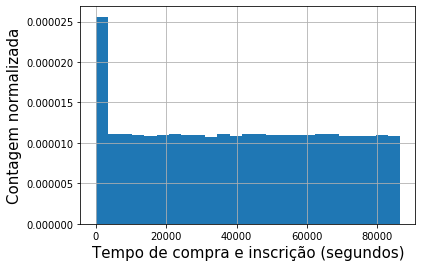

In [27]:
fraude_df.tempo.hist(normed=True,bins=25)
plt.xlabel("Tempo de compra e inscrição (segundos)", fontsize=15)
plt.ylabel("Contagem normalizada", fontsize=15)

$$ X = \sqrt{2} \; \text{erf}^{-1} \left( 2 \Phi - 1 \right) $$
em que $\Phi$ é uma variável aleatória uniformemente distribuída, $X$ é uma variável aleatória normalmente distribuída e $\text{erf}^{-1}$ é o inverso da função de erro. No entanto, antes que essa transformação possa ser feita, primeiro preciso normalizar o recurso para ficar entre 0 e 1.


- *FONTE 1: Rosenblatt M. Remarks on a multivariate transformation. Ann. Math. Stat., 1952; 23: 470–472.*

- *FONTE 2: Van Albada SJ, Robinson PA. Transformation of arbitrary distributions to the normal distribu-tion with application to EEG test-retest reliability (2007) J NeurosciMethods 161: 205–21.*

In [ ]:
def rescale_series(ser):
    ser_min = ser.min() - 1e-5
    ser_max = ser.max() + 1e-5
    new_ser = (ser - ser_min) / (ser_max - ser_min)
    new_ser = new_ser.apply(lambda x: np.sqrt(2)*special.erfinv(2*x - 1))
    return new_ser
